In [6]:
import pandas as pd 
df = pd.read_csv("Resume.csv")

df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [7]:
# check for missing data 
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [8]:
# drop the extra columns 
df = df[['Resume_str', 'Category']]  # only keep the relevant columns 

df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [9]:
print(df['Category'].value_counts() ) #count the resumes per category 

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


**TEXT PREPROCESSING (CLEANING UP RESUME TEXT)**

In [10]:
!pip install nltk

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load stopwords (Outside the function for efficiency)
stopwords_list = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean resume text
def clean_text(text):
    # remove numbers
    text = re.sub(r'\d', '', text)
    
    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize words and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list]

    return ' '.join(words)

# Apply cleaning function
df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

# Show cleaned text
df[['Resume_str', 'cleaned_resume']].head(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanarvindsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanarvindsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aryanarvindsingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aryanarvindsingh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Resume_str,cleaned_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate hr admini...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist u hr operation summary versatile...
2,HR DIRECTOR Summary Over 2...,hr director summary year experience recruiting...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,hr manager skill highlight hr skill hr departm...


**Feature Engineering**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDK Vectorizer
vectorizer = TfidfVectorizer(max_features=2000) #limit to top 2000 important words 

# Transform the cleaned resume text 
X = vectorizer.fit_transform(df['cleaned_resume'])

# convert X to datafram for better visualization 
tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

tfidf_df.head()

,ability,able,absence,abuse,academic,academy,acceptance,access,accessory,accomplished,...,written,wrote,www,xml,xp,year,yearly,york,young,youth
0,0.000000,0.00000,0.049675,0.0,0.0,0.0,0.0,0.000000,0.0,0.040973,...,0.00000,0.000000,0.0,0.0,0.0,0.016706,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.02721,0.000000,0.0,0.0,0.0,0.0,0.024280,0.0,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.067948,0.0,0.0,0.0,0.0
3,0.037486,0.00000,0.081582,0.0,0.0,0.0,0.0,0.098041,0.0,0.000000,...,0.05096,0.000000,0.0,0.0,0.0,0.027437,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.032034,0.0,0.000000,...,0.00000,0.020731,0.0,0.0,0.0,0.008965,0.0,0.0,0.0,0.0


In [13]:
print(vectorizer.get_feature_names_out()[:20])  # Show first 20 words 


['ability' 'able' 'absence' 'abuse' 'academic' 'academy' 'acceptance'
 'access' 'accessory' 'accomplished' 'accomplishment' 'accordance'
 'according' 'account' 'accountability' 'accountable' 'accountant'
 'accounting' 'accrual' 'accuracy']


**Train a ML Model**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define input(X) and output(y)
y = df['Category']

# split the data 
# Split dataset with numeric labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train the random forest classifier 
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# predict on the test dataset 
y_pred = model.predict(X_test)

# evaluate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy : {accuracy:.2f}")


Model Accuracy : 0.69


**Train different models with better accuracy on this dataset**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# list of the models to test
models = {
    "Random Forest" : RandomForestClassifier(n_estimators= 100, random_state= 42),
    "Logistic Regression" : LogisticRegression(max_iter = 1000),
    "Naive Bayes" : MultinomialNB(),
    "SVM" : SVC(kernel = 'linear')
}

# train and evaluate each model 
for name, model in models.items():
    # train the model
    model.fit(X_train, y_train) 
    # predict
    y_pred = model.predict(X_test)
    #calculate the accuracy 
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy : {accuracy:.2f}")


Model Accuracy : 0.69
Model Accuracy : 0.65
Model Accuracy : 0.56
Model Accuracy : 0.63


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define hyperparameter grid
# trying different alpha values 
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}

# Perform grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best alpha value
print(f"Best Alpha: {grid_search.best_params_['alpha']}")

# Train best model
best_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_nb.fit(X_train, y_train)
y_pred = best_nb.predict(X_test)

# Evaluate new accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Naïve Bayes Accuracy: {accuracy:.2f}")


Best Alpha: 0.5
Improved Naïve Bayes Accuracy: 0.58


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5],  # Minimum samples to split
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Params: {grid_search.best_params_}")

# Train best model
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Random Forest Accuracy: {accuracy:.2f}")


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Improved Random Forest Accuracy: 0.68


In [18]:
!pip install xgboost

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert category labels to numbers
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Print mapping 
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'ACCOUNTANT': 0, 'ADVOCATE': 1, 'AGRICULTURE': 2, 'APPAREL': 3, 'ARTS': 4, 'AUTOMOBILE': 5, 'AVIATION': 6, 'BANKING': 7, 'BPO': 8, 'BUSINESS-DEVELOPMENT': 9, 'CHEF': 10, 'CONSTRUCTION': 11, 'CONSULTANT': 12, 'DESIGNER': 13, 'DIGITAL-MEDIA': 14, 'ENGINEERING': 15, 'FINANCE': 16, 'FITNESS': 17, 'HEALTHCARE': 18, 'HR': 19, 'INFORMATION-TECHNOLOGY': 20, 'PUBLIC-RELATIONS': 21, 'SALES': 22, 'TEACHER': 23}


In [20]:
from xgboost import XGBClassifier
# Ensure we use the encoded labels, NOT the original category names
X_train, X_test, y_train, y_test = train_test_split(X, df['Category_encoded'], test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, use_label_encoder= False, eval_metric = 'logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")

/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.73


**Save the model**

In [21]:
import joblib

# save the trained xgboost model 
joblib.dump(xgb_model, "xgboost_resume_classifier.pkl")

# Save the label encoder (for decoding predictions later)
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and encoder saved successfully")

Model and encoder saved successfully


This function is used to classify a new resume into a job category using a pre-trained XGBoost model and a label encoder.

Why Do We Need This Code?
After training and saving the XGBoost classifier, we need a way to classify new resumes.
This function: 
✅ Loads the trained model.

✅ Cleans and preprocesses the input text.

✅ Converts text into TF-IDF numerical features.

✅ Uses the model to predict the job category.

✅ Converts the numeric prediction into a human-readable category name.


In [22]:
def classify_resume(text):
    # load the saved model and the label encoder 
    model = joblib.load("xgboost_resume_classifier.pkl")
    encoder = joblib.load("label_encoder.pkl")

    # clean the input resume text 
    cleaned_text = clean_text(text)

    # Convert text to TF-IDF features 
    text_vectorized = vectorizer.transform([cleaned_text])

    # Prediction category 
    prediction = model.predict(text_vectorized)


    # convert the numeric prediction back to the category name 
    # we add [0] as the inverse_transform returns an array with 2 values
    # the category and secondly is the datatype, so we only want the category hence 
    # we only acess the first value.
    predicted_category = encoder.inverse_transform(prediction)[0]

    return predicted_category

resumes = [
    "Software engineer skilled in Python, Java, and backend development.",
    "Data scientist with expertise in machine learning, deep learning, and AI.",
    "Marketing specialist with experience in brand strategy, SEO, and digital ads.",
    "Financial analyst with strong background in investment banking and risk analysis."
]

for r in resumes:
    print(f"Resume: {r}\nPredicted Category: {classify_resume(r)}\n")


Resume: Software engineer skilled in Python, Java, and backend development.
Predicted Category: BUSINESS-DEVELOPMENT

Resume: Data scientist with expertise in machine learning, deep learning, and AI.
Predicted Category: BUSINESS-DEVELOPMENT

Resume: Marketing specialist with experience in brand strategy, SEO, and digital ads.
Predicted Category: DIGITAL-MEDIA

Resume: Financial analyst with strong background in investment banking and risk analysis.
Predicted Category: BANKING



Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


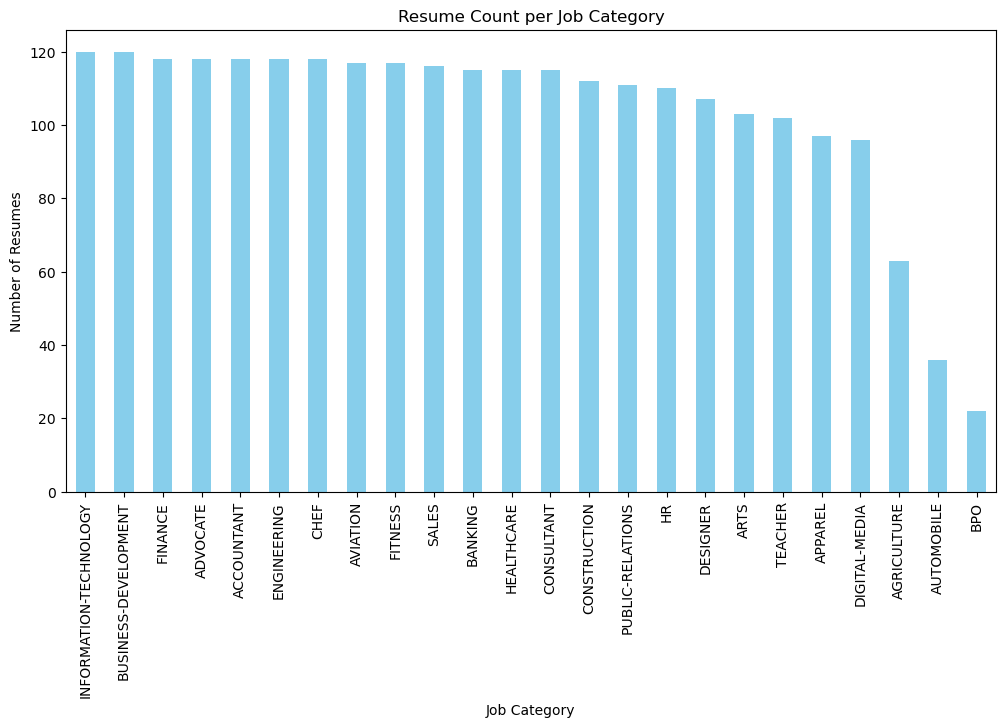

In [23]:
import pandas as pd

# Count the number of resumes per job category
category_distribution = df['Category'].value_counts()

# Display the counts
print(category_distribution)

# Visualize with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title("Resume Count per Job Category")
plt.xlabel("Job Category")
plt.ylabel("Number of Resumes")
plt.xticks(rotation=90)
plt.show()


In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, df['Category_encoded'])

print("New class distribution:\n", pd.Series(y_resampled).value_counts())


New class distribution:
 Category_encoded
19    120
13    120
4     120
7     120
21    120
11    120
0     120
15    120
3     120
16    120
10    120
5     120
14    120
12    120
22    120
8     120
2     120
17    120
18    120
9     120
1     120
23    120
20    120
6     120
Name: count, dtype: int64


In [25]:
!pip install imblearn

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


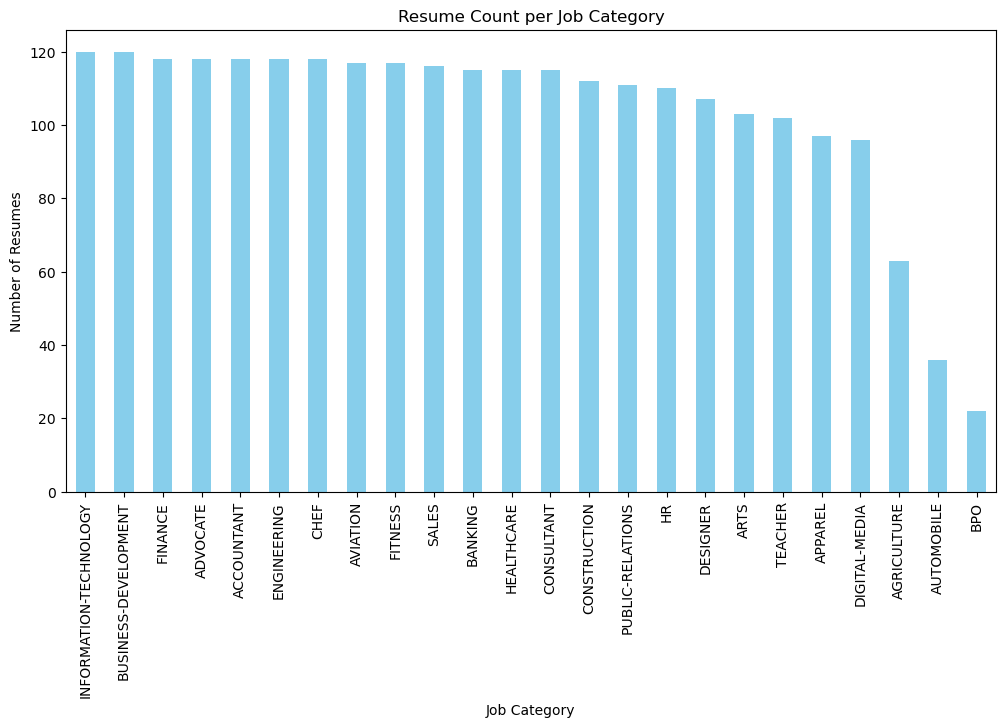

In [26]:
import pandas as pd

# Count the number of resumes per job category
category_distribution = df['Category'].value_counts()

# Display the counts
print(category_distribution)

# Visualize with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title("Resume Count per Job Category")
plt.xlabel("Job Category")
plt.ylabel("Number of Resumes")
plt.xticks(rotation=90)
plt.show()


In [27]:
# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [28]:
pip install streamlit pymupdf 

Note: you may need to restart the kernel to use updated packages.


In [29]:
import os
print(os.listdir())


['tfidf_vectorizer.pkl', 'label_encoder.pkl', 'Teacher_Resume.pdf', '.DS_Store', 'requirements.txt', 'resume_dashboard.py', 'Software_Engineer_Resume.pdf', 'README.md', 'resume_analyser.ipynb', 'Resume.csv', 'xgboost_resume_classifier.pkl', '.ipynb_checkpoints', 'Graphic_Designer_Resume.pdf', '.git', 'Mechanical_Engineer_Resume.pdf', 'Resume.csv.zip', 'test_app.py']


In [30]:
with open("resume_dashboard.py", "w") as f:
    f.write("# This will be your Streamlit app script")


**Highlight Missing Skills in resume**

In [34]:
# Dictionary mapping job categories to required skills
job_skills = {
    "INFORMATION-TECHNOLOGY": {"Python", "Java", "C++", "SQL", "Machine Learning", "Data Science"},
    "ENGINEERING": {"AutoCAD", "MATLAB", "SolidWorks", "Mechanical Design", "Thermodynamics"},
    "BUSINESS-DEVELOPMENT": {"Sales", "Marketing", "Negotiation", "Customer Relationship"},
    "FINANCE": {"Accounting", "Financial Modeling", "Excel", "Risk Management"},
    "HEALTHCARE": {"Patient Care", "Medical Terminology", "Diagnosis", "Pharmacology"},
    "ARTS": {"Graphic Design", "Adobe Photoshop", "Illustration", "Typography"},
    "HR": {"Recruitment", "Employee Relations", "Payroll", "HR Policies"},
}


In [36]:
import re

def extract_resume_skills(resume_text, category):
    """
    Compares the extracted resume text with job-specific skills
    and identifies missing skills.
    """
    if category not in job_skills:
        return None, None  # No predefined skills for this category
    
    expected_skills = job_skills[category]
    found_skills = {skill for skill in expected_skills if re.search(rf"\b{skill}\b", resume_text, re.IGNORECASE)}
    missing_skills = expected_skills - found_skills  # Skills that were not found
    
    return found_skills, missing_skills
